# Project Problem Statement - FMST

## Problem Statement
Concrete Strength Prediction

## Objective
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

## Resources Available 
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.
-- use download method

## Attribute Information
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
 

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable
 

## Steps and Tasks
1. Exploratory Data Quality Report Reflecting the Following  
    - Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)
    - Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)
    - Using various plots, write the insights/observations about it. (6 Marks)
1. Bi-variate analysis between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)
1. Feature Engineering techniques
    - Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)
    - Get the data model ready and do a train test split.
    - Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)
1. Creating the Model and Tuning It:
    - Algorithms that you think will be suitable for this project.
    - Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)
    - Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)
1. Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)
1. Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)
1. The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 1. 90 (4 marks), 80 1. 85( 3 marks), <80 (2 marks)


# Code


## 00. Import Packages and Data 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [12]:
data.shape

(1030, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## 01A. Exploratory Data Quality Report 
### Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)

In [7]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

### Insights:
- All continuous variables, i.e. all numbers. No categorical variables.  
- Skewness/Distribution:
    - Majority of columns are positively skewed; mean > median. 
    - Water has a symmetrical distribution, zero skewness, mean = median.   
    - Age has a larger positive skewness relative to the rest of the dataset. 
        - There is a significant gap between the mean (28) and the max value (365). 
- All values have 6 decimal places, including age which is listed as an integer not a float. Will need to trim. 

## 01B. Exploratory Data Quality Report 
### Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)

In [24]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [28]:
(data == 0).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [122]:
print('Count of records above and below the outlier bounds')
print()
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_outlier_bound = q1 - (1.5 * iqr).round(2)
    upper_outlier_bound = q3 + (1.5 * iqr).round(2)
    lower_outliers = data[data[col] < lower_outlier_bound][col].count()
    upper_outliers = data[data[col] > upper_outlier_bound][col].count()
    print(data[col].name)
    print('lower bound:', lower_outlier_bound)
    print('records below the lower bound:',  lower_outliers)
    print('upper bound:', upper_outlier_bound)
    print('records above the upper bound:', upper_outliers)
    print()

Count of records above and below the outlier bounds

cement
lower bound: -44.065
records below the lower bound: 0
upper bound: 586.44
records above the upper bound: 0

slag
lower bound: -214.42
records below the lower bound: 0
upper bound: 357.37
records above the upper bound: 2

ash
lower bound: -177.45
records below the lower bound: 0
upper bound: 295.75
records above the upper bound: 0

water
lower bound: 124.25
records below the lower bound: 5
upper bound: 232.65
records above the upper bound: 4

superplastic
lower bound: -15.3
records below the lower bound: 0
upper bound: 25.5
records above the upper bound: 10

coarseagg
lower bound: 785.9
records below the lower bound: 0
upper bound: 1175.5
records above the upper bound: 0

fineagg
lower bound: 591.3699999999999
records below the lower bound: 0
upper bound: 963.58
records above the upper bound: 5

age
lower bound: -66.5
records below the lower bound: 0
upper bound: 129.5
records above the upper bound: 59

strength
lower bound: -9

In [108]:
data.duplicated().any()

True

In [117]:
data[data.duplicated() == True]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [119]:
print('total duplicated records:', data[data.duplicated() == True].shape[0])

total duplicated records: 25


### Insights:
- Initially, I instinctively (blindly) believed the isnull() and info() method and thought there were no null values. However, it occurred to me that since these are all continuous variables, a '0' does not necesssarily mean '0' - it could possibly also mean null. Overall, without access to the individuals/team that collected the data, it is almost impossible to deduce what '0' means. I will accept this as '0' and not null, pending further analysis. 
- age, superplastic, and fineagg have the most outliers above the upper bound

## 01C. Exploratory Data Quality Report 
### Using various plots, write the insights/observations about it. (6 Marks)

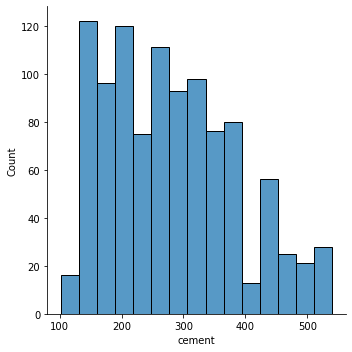

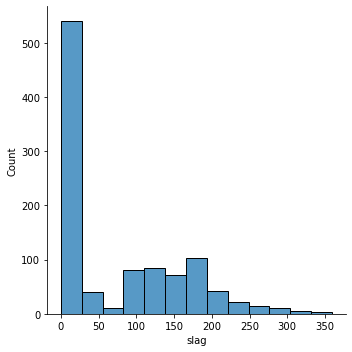

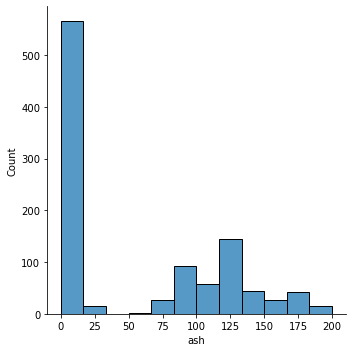

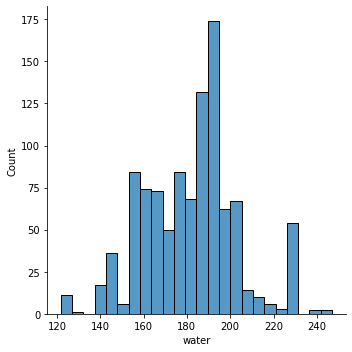

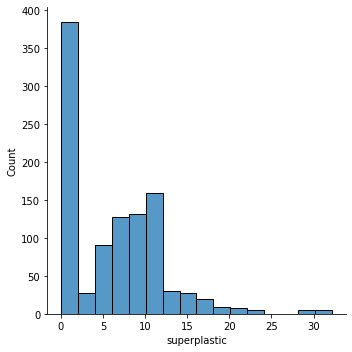

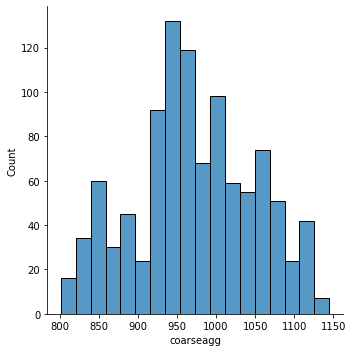

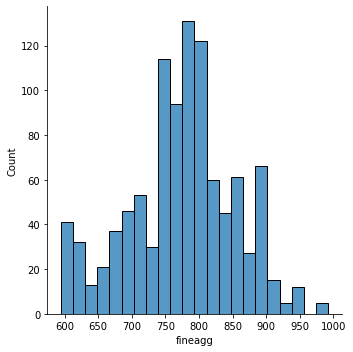

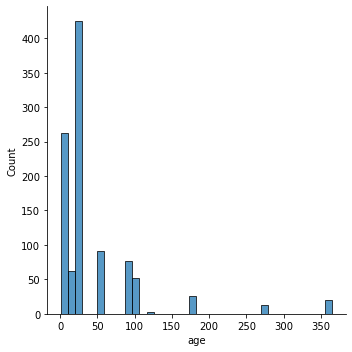

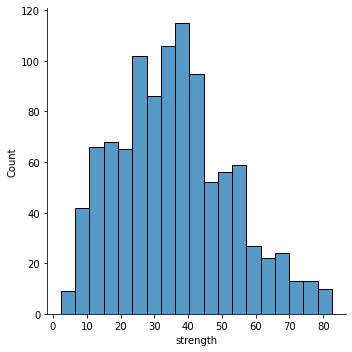

In [131]:
# # def uvanalysis(data):
#     for col in data.columns: 
# #         if data[col].dtype == 'object':
# #             sns.countplot(x=df[col], data=df)
# #             plt.show()
# #         if data[col].dtype == 'int64':
#             sns.displot(data[col])
#             plt.show()
        
# # uvanalysis(data)

# # def uvanalysis(data):
# #         if data[col].dtype == 'object':
# #             sns.countplot(x=df[col], data=df)
# #             plt.show()
# #         if data[col].dtype == 'int64':
for col in data.columns: 
    sns.displot(data[col])
    plt.show()
        


## 02. Bi-variate analysis 

## 03A. Feature Engineering techniques
### Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)

## 03B. Feature Engineering techniques
### Get the data model ready and do a train test split.

## 03C. Feature Engineering techniques
### Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)

## 04A. Creating the Model and Tuning It:
### Algorithms that you think will be suitable for this project.

## 04B. Creating the Model and Tuning It:
### Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)

## 04C. Creating the Model and Tuning It:
### Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)

## 05. Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)

## 06. Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)

## 07. The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 1. 90 (4 marks), 80 1. 85( 3 marks), <80 (2 marks)